In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

Text(0, 0.5, 'Acc X')

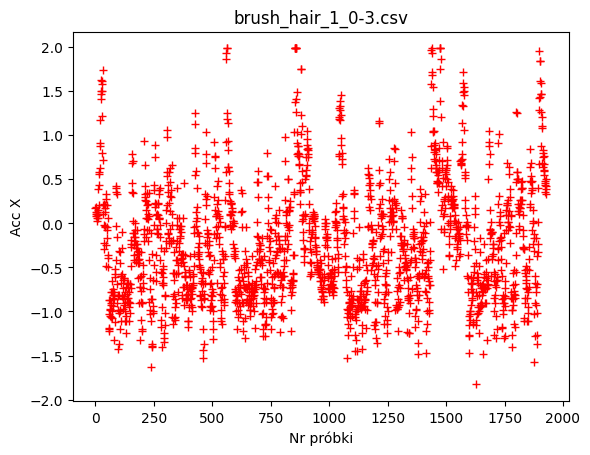

In [2]:
df0 = pd.read_csv('brush_hair_1_0.csv', names=['Acc_X', 'Acc_Y', 'Acc_Z'])
df0.Acc_X /= 64
df0.Acc_Y /= 64
df0.Acc_Z /= 64

df1 = pd.read_csv('brush_hair_1_1.csv', names=['Acc_X', 'Acc_Y', 'Acc_Z'])
df1.Acc_X /= 64
df1.Acc_Y /= 64
df1.Acc_Z /= 64

df2 = pd.read_csv('brush_hair_1_2.csv', names=['Acc_X', 'Acc_Y', 'Acc_Z'])
df2.Acc_X /= 64
df2.Acc_Y /= 64
df2.Acc_Z /= 64

df3 = pd.read_csv('brush_hair_1_3.csv', names=['Acc_X', 'Acc_Y', 'Acc_Z'])
df3.Acc_X /= 64
df3.Acc_Y /= 64
df3.Acc_Z /= 64

dfTrain = pd.concat([df0, df1, df2, df3], ignore_index=True)

plt.figure()
plt.plot(dfTrain.Acc_X, 'r+')
plt.title('brush_hair_1_0-3.csv')
plt.xlabel('Nr próbki')
plt.ylabel('Acc X')

Text(0, 0.5, 'Acc X')

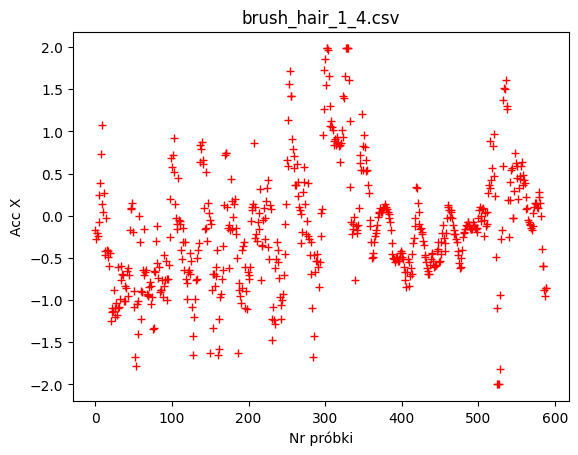

In [3]:
df4 = pd.read_csv('brush_hair_1_4.csv', names=['Acc_X', 'Acc_Y', 'Acc_Z'])
df4.Acc_X /= 64
df4.Acc_Y /= 64
df4.Acc_Z /= 64

dfTest = df4

plt.figure()
plt.plot(dfTest.Acc_X, 'r+')
plt.title('brush_hair_1_4.csv')
plt.xlabel('Nr próbki')
plt.ylabel('Acc X')

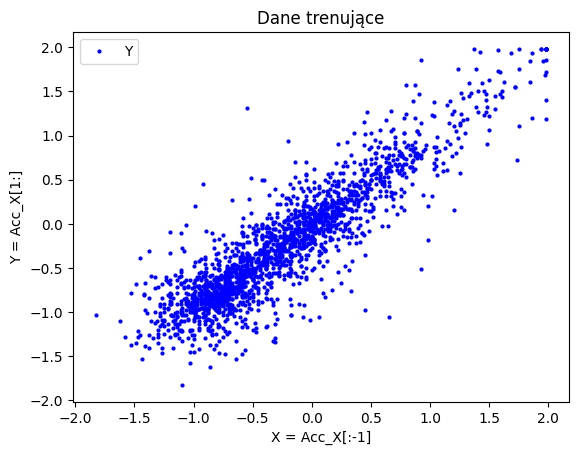

In [4]:
tmp = dfTrain.Acc_X.to_numpy()

X = tmp[0:len(tmp)-1]
Y = tmp[1:len(tmp)]

plt.figure()
plt.plot(X, Y, 'bo', label='Y', markersize=2)
plt.title('Dane trenujące')
plt.xlabel('X = Acc_X[:-1]')
plt.ylabel('Y = Acc_X[1:]')
plt.legend(['Y'])

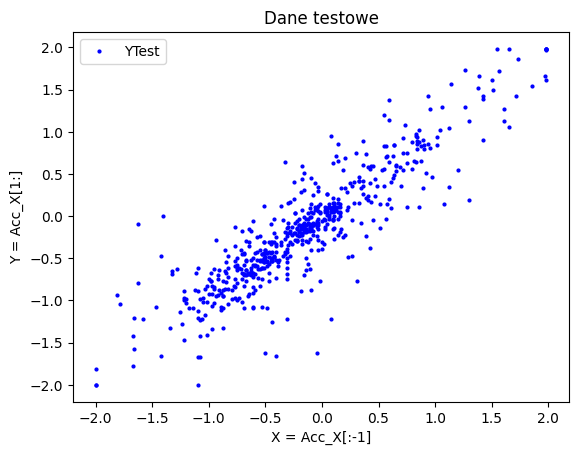

In [5]:
tmp = dfTest.Acc_X.to_numpy()

XTest = tmp[0:len(tmp)-1]
YTest = tmp[1:len(tmp)]

plt.figure()
plt.plot(XTest, YTest, 'bo', label='YTest', markersize=2)
plt.title('Dane testowe')
plt.xlabel('X = Acc_X[:-1]')
plt.ylabel('Y = Acc_X[1:]')
plt.legend(['YTest'])

In [6]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))

In [7]:
optim = Adam(learning_rate=0.01,
             beta_1=0.9,
             beta_2=0.999,
             epsilon=1e-07)
model.compile(optimizer=optim, loss='mean_squared_error', metrics=['mean_squared_error'])

In [8]:
hist = model.fit(X, Y, epochs=50, verbose=1, batch_size=100, validation_split=0.05)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2064 - mean_squared_error: 0.2064 - val_loss: 0.0836 - val_mean_squared_error: 0.0836
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1019 - mean_squared_error: 0.1019 - val_loss: 0.0846 - val_mean_squared_error: 0.0846
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0872 - mean_squared_error: 0.0872 - val_loss: 0.0780 - val_mean_squared_error: 0.0780
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.0806 - val_mean_squared_error: 0.0806
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0928 - mean_squared_error: 0.0928 - val_loss: 0.0787 - val_mean_squared_error: 0.0787
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0878 - mean_squared_error: 0.0878 - val_loss: 0.0791 - val_mean_squared_error: 0.0791
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.0815 - val_mean

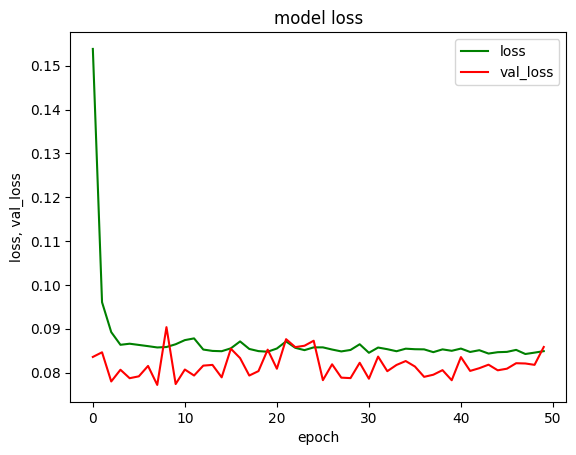

In [9]:
plt.figure()
plt.plot(hist.history['loss'], '-g', label='loss')
plt.plot(hist.history['val_loss'], '-r', label='val_loss')
plt.title('model loss')
plt.ylabel('loss, val_loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])

In [10]:
YTestPred = model.predict(XTest)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


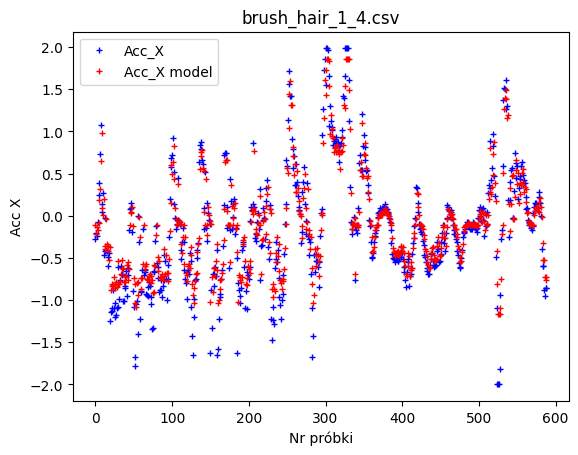

In [11]:
plt.figure()
plt.plot(YTest, 'b+', label='Y', markersize=4)
plt.plot(YTestPred, 'r+', label='YPred', markersize=4)
plt.xlabel('Nr próbki')
plt.ylabel('Acc X')
plt.title('brush_hair_1_4.csv')
plt.legend(['Acc_X', 'Acc_X model'])

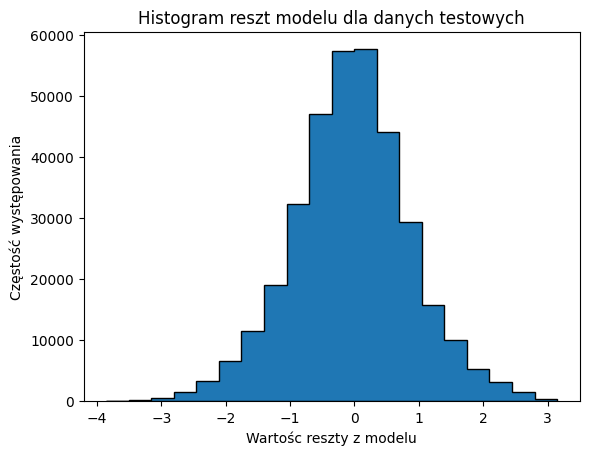

In [12]:
residuals = YTest - YTestPred
counts, bins = np.histogram(residuals, bins=20)

plt.figure()
plt.hist(bins[:-1], bins, weights=counts, edgecolor='black', linewidth=1, histtype='stepfilled', rwidth=0.8)
plt.title('Histogram reszt modelu dla danych testowych')
plt.xlabel('Wartośc reszty z modelu')
plt.ylabel('Częstość występowania')
plt.show()

In [13]:
def mape(yreal, ypred):
    return float(100/len(yreal) * np.sum(np.abs((yreal - ypred) / yreal)))


def mmape(yreal, ypred):
    return float(100/len(yreal) * np.sum(np.abs((yreal - ypred) / (np.max(yreal)-np.min(yreal)))))


def rmse(yreal, ypred):
    return np.sqrt((np.sum((yreal - ypred) ** 2))/len(yreal))


def nrmse(yreal, ypred):
    return np.sqrt((np.sum((yreal - ypred) ** 2))/len(yreal))/np.std(yreal)


def aic(yreal, mmape, params):
    return len(yreal) * np.log(mmape) + 2 * params


def bic(yreal, mmape, params):
    return len(yreal) * np.log(mmape) + params * np.log(len(yreal))

mape = mape(YTest, YTestPred)
mmape = mmape(YTest, YTestPred)
rmse = rmse(YTest, YTestPred)
nrmsd = nrmse(YTest, YTestPred)
aic = aic(YTest, mmape, model.count_params())
bic = bic(YTest, mmape, model.count_params())

print(f'MAPE: {mape}')
print(f'MMAPE: {mmape}')
print(f'RMSE: {rmse}')
print(f'NRMSE: {nrmsd}')
print(f'AIC: {aic}')
print(f'BIC: {bic}')

MAPE: inf
MMAPE: 10399.592597129571
RMSE: 22.096300535968524
NRMSE: 31.622463495664103
AIC: 5539.968405584444
BIC: 5741.376010032416


C:\Users\acer\AppData\Local\Temp\ipykernel_22796\1192676950.py:2: RuntimeWarning: divide by zero encountered in divide
  return float(100/len(yreal) * np.sum(np.abs((yreal - ypred) / yreal)))
